# The comparison of the profitability of two mobile operators' tariffs.



# Project Description:
Customers of a mobile operator are offered two tariff plans: "Smart" and "Ultra." To adjust the advertising budget, the commercial department wants to understand which tariff brings in more revenue.

**Task:**
Conduct a preliminary analysis of the tariffs on a small sample of customers and determine which tariff is better.

**Data:**
Information about 500 users in separate files: their origins, which tariff they use, the number of calls, messages, internet sessions, etc.

**Description of Tariffs:**

**"Smart" Tariff:**
- Monthly fee: 550 rubles
- Includes 500 minutes of talk time, 50 messages, and 15 GB of internet traffic
- Additional service costs beyond the tariff package:
   - Minute of talk time — 3 rubles. The operator always rounds up the number of used minutes and megabytes. If a user talks for just 1 second, it is counted as a whole minute.
   - Message — 3 rubles.
   - 1 GB of internet traffic — 200 rubles.

**"Ultra" Tariff:**
- Monthly fee: 1950 rubles
- Includes 3000 minutes of talk time, 1000 messages, and 30 GB of internet traffic
- Additional service costs beyond the tariff package:
   - Minute of talk time — 1 ruble.
   - Message — 1 ruble.
   - 1 GB of internet traffic — 150 rubles.


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats as st

## Data exploration.


In [2]:
# Connecting Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path = "/content/drive/My Drive/TelecomAnalysis/"

### Exploration of the `calls` file.


In [4]:
calls = pd.read_csv(folder_path + "calls.csv")

In [5]:
# Displaying 5 rows
display(calls.sample(5))

,id,call_date,duration,user_id
109774,1282_668,2018-12-25,0.00,1282
177542,1439_89,2018-09-10,1.09,1439
155906,1384_732,2018-10-11,5.34,1384
155697,1384_523,2018-09-09,17.67,1384
1508,1005_105,2018-03-01,0.00,1005


In [6]:
# Displaying basic information for the DataFrame using the `info()` method
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


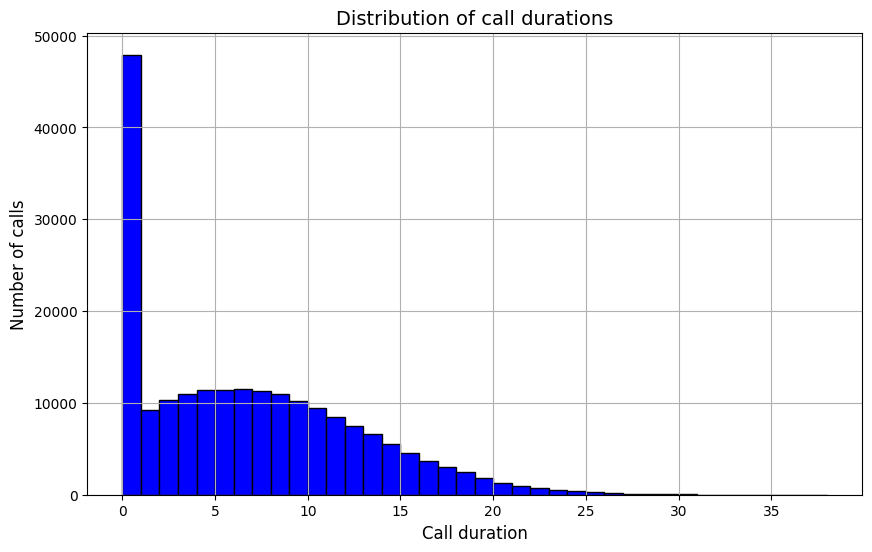

In [7]:
# Displaying a histogram for the 'duration' column

# Generating a histogram for the 'duration' column
plt.figure(figsize=(10, 6)) # Set the figure size for the histogram
calls['duration'].hist(bins=38, color='blue', edgecolor='black')  # Draw the histogram

# Adding axis labels and a title
plt.xlabel('Call duration', fontsize=12)  # X-axis label
plt.ylabel('Number of calls', fontsize=12)  # Y-axis label
plt.title('Distribution of call durations', fontsize=14)  # Chart title

# Displaying the histogram
plt.show()

**Conclusion:** The call duration follows an exponential distribution - most calls have a short duration, while long calls are rare.

### Exploration of the `internet` file.


In [8]:
sessions = pd.read_csv(folder_path + "internet.csv")

In [9]:
# Displaying 5 rows
display(sessions.sample(5))

,Unnamed: 0,id,mb_used,session_date,user_id
60941,60941,1207_11,362.79,2018-11-16,1207
32697,32697,1114_94,272.84,2018-08-18,1114
65043,65043,1221_156,217.43,2018-11-13,1221
3293,3293,1011_160,398.57,2018-04-22,1011
47910,47910,1165_96,286.26,2018-11-14,1165


In [10]:
# Displaying basic information for the DataFrame using the `info()` method
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


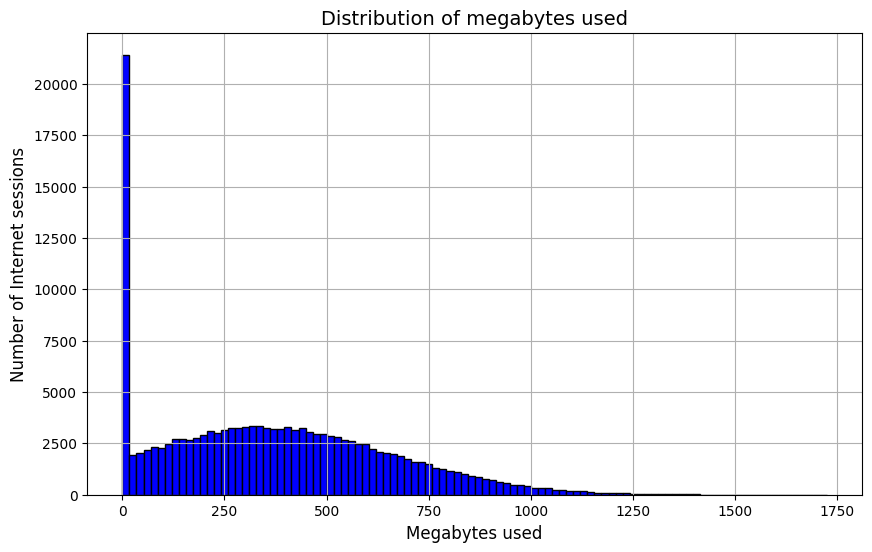

In [11]:
# Displaying a histogram for the 'mb_used' column

# Generating a histogram for the 'mb_used' column
plt.figure(figsize=(10, 6)) # Set the figure size for the histogram
sessions['mb_used'].hist(bins=100, color='blue', edgecolor='black')  # Draw the histogram

# Adding axis labels and a title
plt.xlabel('Megabytes used', fontsize=12)  # X-axis label
plt.ylabel('Number of Internet sessions', fontsize=12)  # Y-axis label
plt.title('Distribution of megabytes used', fontsize=14)  # Chart title

# Displaying the histogram
plt.show()

**Conclusion:** The distribution of megabytes used follows an exponential pattern - in most internet sessions, the amount of data used is very low, while sessions with a large amount of data usage are rare.

### Exploration of the `messages` file.

In [12]:
messages = pd.read_csv(folder_path + "messages.csv")

In [13]:
# Displaying 5 rows
display(messages.sample(5))

,id,message_date,user_id
117198,1477_81,2018-12-29,1477
13263,1055_229,2018-08-19,1055
70150,1299_430,2018-07-20,1299
2201,1005_63,2018-07-06,1005
1305,1004_359,2018-06-27,1004


In [14]:
# Displaying basic information for the DataFrame using the `info()` method
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Exploration of the `tariffs` file.

In [15]:
tariffs = pd.read_csv(folder_path + "tariffs.csv")

In [16]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
# Displaying basic information for the DataFrame using the `info()` method
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Exploration of the `users` file.

In [18]:
users = pd.read_csv(folder_path + "users.csv")

In [19]:
# Displaying 5 rows
display(users.sample(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
318,1318,53,NaN,Курган,Марьяна,Анищенко,2018-03-22,ultra
54,1054,33,NaN,Омск,Кристина,Платонова,2018-03-20,smart
186,1186,21,NaN,Самара,Рэм,Абакумов,2018-02-02,smart
203,1203,39,NaN,Москва,Владимир,Григорьев,2018-03-13,ultra
199,1199,27,NaN,Чебоксары,Агата,Демьянова,2018-09-10,smart


In [20]:
# Displaying basic information for the DataFrame using the `info()` method
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Data preparation for analysis.

### Correcting data types in date columns:
- `reg_date` from the `users` table
- `churn_date` from the `users` table
- `call_date` from the `calls` table
- `message_date` from the `messages` table
- `session_date` from the `sessions` table.

In [21]:
# Processing the 'reg_date' column
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

# Processing the 'churn_date' column
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')

# Processing the 'call_date' column
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

# Processing the 'message_date' column
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

# Processing the 'session_date' column
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y.%m.%d')

### Rounding up the values in the 'duration' column and changing the data type.

In [22]:
# Rounding the values in the 'duration' column using np.ceil() and converting the type to int
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype(int)

### Removing the 'Unnamed: 0' column from the 'sessions' DataFrame.

In [23]:
sessions = sessions.drop('Unnamed: 0', axis=1)

### Creating a 'month' column in the 'calls' DataFrame with the month number from the 'call_date' column.

In [24]:
calls['month'] = calls['call_date'].dt.month

### Creating a 'month' column in the 'messages' DataFrame with the month number from the 'message_date' column.

In [25]:
messages['month'] = messages['message_date'].dt.month

### Creating a 'month' column in the 'sessions' DataFrame with the month number from the 'session_date' column.

In [26]:
sessions['month'] = sessions['session_date'].dt.month

### Counting the number of outgoing call records for each user per month.

In [27]:
calls_per_month = calls.groupby(by=['user_id', 'month']).agg(calls=('duration', 'count'))

In [28]:
# Displaying the first 30 rows on the screen
display(calls_per_month.head(30))

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

### Calculating the total minutes of talk time used by each user per month and saving it in the 'minutes_per_month' variable.

In [29]:
minutes_per_month = calls.groupby(by=['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [30]:
# Displaying the first 30 rows on the screen
display(minutes_per_month.head(30))

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

### Calculating the number of messages sent by each user per month and saving it in the 'messages_per_month' variable.

In [31]:
messages_per_month = messages.groupby(by=['user_id', 'month']).agg(messages=('message_date', 'count'))

In [32]:
# Displaying the first 30 rows on the screen
display(messages_per_month.head(30))

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

### Calculating the total megabytes used by each user per month and saving it in the 'sessions_per_month' variable.

In [33]:
sessions_per_month = sessions.groupby(by=['user_id', 'month']).agg({'mb_used': 'sum'})

In [34]:
# Displaying the first 30 rows on the screen
display(sessions_per_month.head(30))

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## Data analysis and revenue calculation.

Combining all the previously calculated values into one DataFrame 'user_behavior'.
For each "user - month" pair, there will be information about the tariff, number of calls, messages, and used megabytes.

In [35]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of the customers in the dataset have terminated their contracts.

In [36]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Checking for missing values in the 'user_behavior' table after merging:

In [37]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Filling the missing values in the data:

In [38]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

# Adding information about the tariffs.

In [39]:
# Renaming the 'tariff_name' column to a simpler 'tariff'
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [40]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Сalculating the number of minutes of talk time, messages, and megabytes that exceed the included limits in the tariff:

In [41]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Converting exceeding tariff megabytes to gigabytes and saving in the 'paid_gb' column:

In [42]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Calculating revenue for minutes, messages, and internet usage:

In [43]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Calculating monthly revenue from each user, which will be stored in the 'total_cost' column:

In [44]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

The DataFrame `stats_df` will store key statistics for each "month-tariff" pair, including:

In [45]:
# Saving statistical metrics for each "month-tariff" pair in one table `stats_df` (mean, standard deviation, median):

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],
            values=['calls', 'minutes', 'messages', 'mb_used'],
            aggfunc=['mean', 'std', 'median']
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std',
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Distribution of the average number of calls by tariff types and months:

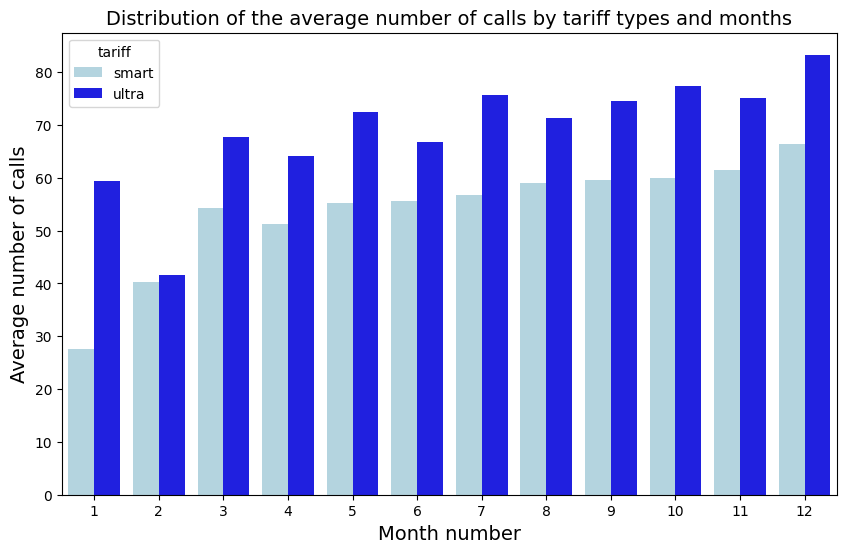

In [46]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the average number of calls by tariff types and months', fontsize=14)
ax.set_xlabel('Month number', fontsize=14)
ax.set_ylabel('Average number of calls', fontsize=14);

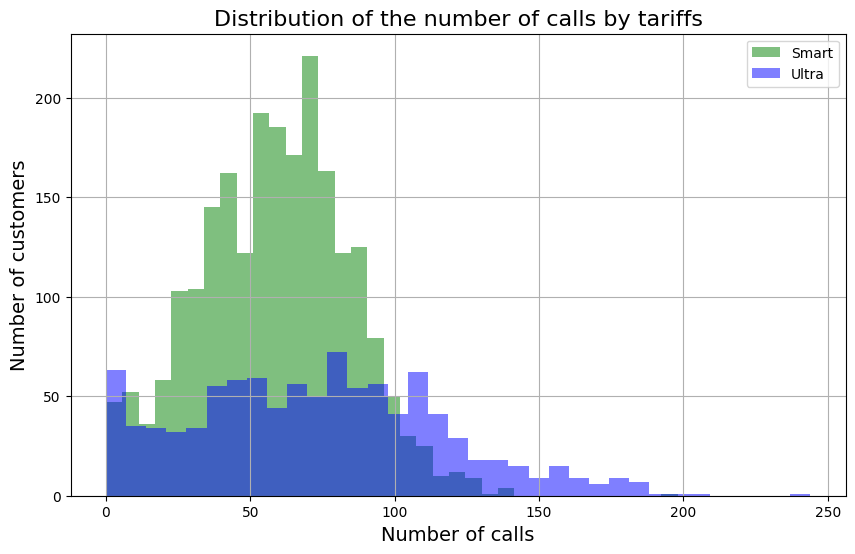

In [47]:
plt.figure(figsize=(10, 6))

user_behavior[user_behavior['tariff'] =='smart']['calls'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['calls'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Distribution of the number of calls by tariffs', fontsize=16);

# Distribution of the average call duration by tariff types and months:

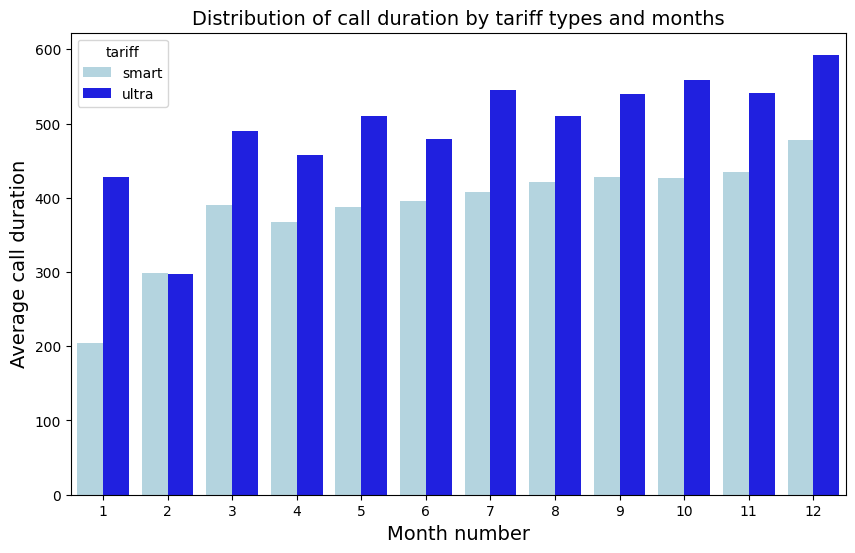

In [48]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of call duration by tariff types and months', fontsize=14)
ax.set_xlabel('Month number', fontsize=14)
ax.set_ylabel('Average call duration', fontsize=14);

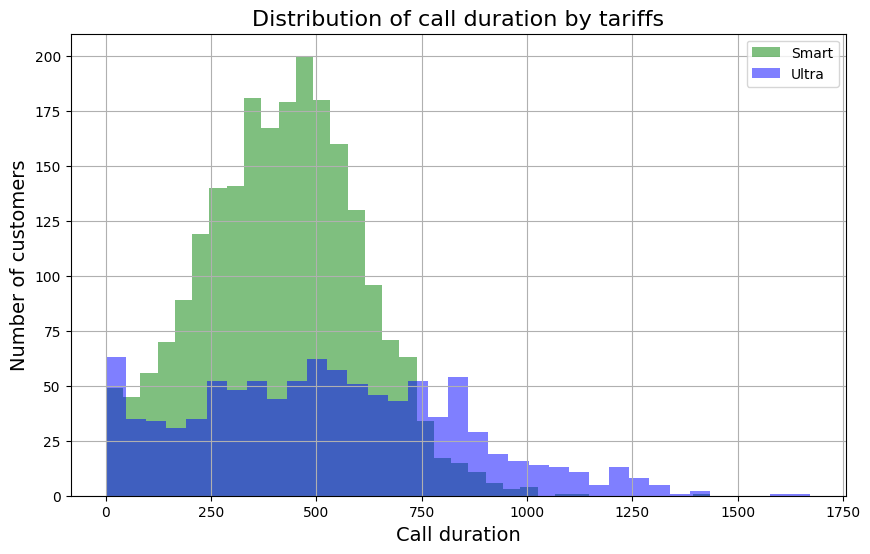

In [49]:
plt.figure(figsize=(10, 6))

user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.legend(['Smart', 'Ultra'])

plt.xlabel('Call duration', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Distribution of call duration by tariffs', fontsize=16);

The average call duration for Ultra tariff subscribers is higher than for Smart tariff subscribers. Over the course of the year, users of both tariffs increase the average duration of their calls. The growth in the average call duration for Smart tariff subscribers is steady throughout the year. Users of the Ultra tariff plan do not show a similar linear trend. It is worth noting that in February, both tariff plan subscribers had the lowest call duration.

Distribution of the average number of messages by tariff types and months:

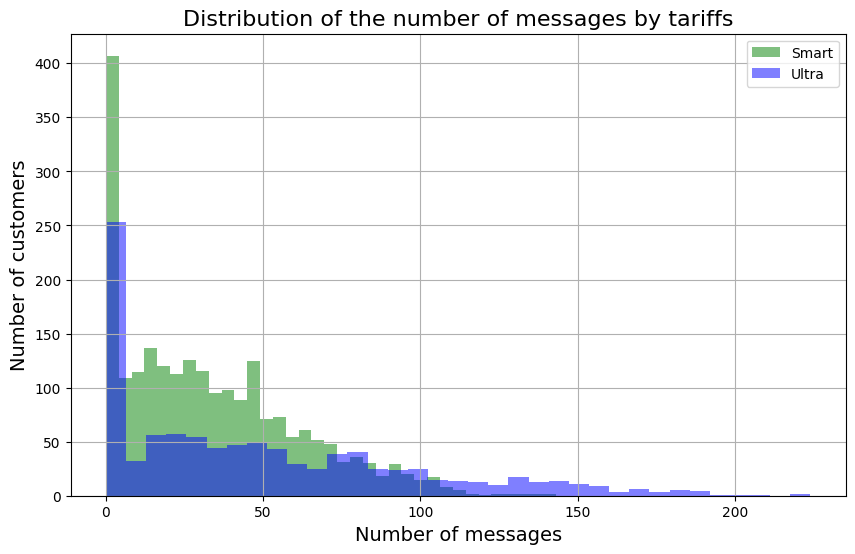

In [50]:
plt.figure(figsize=(10, 6))

user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of messages', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Distribution of the number of messages by tariffs', fontsize=16);

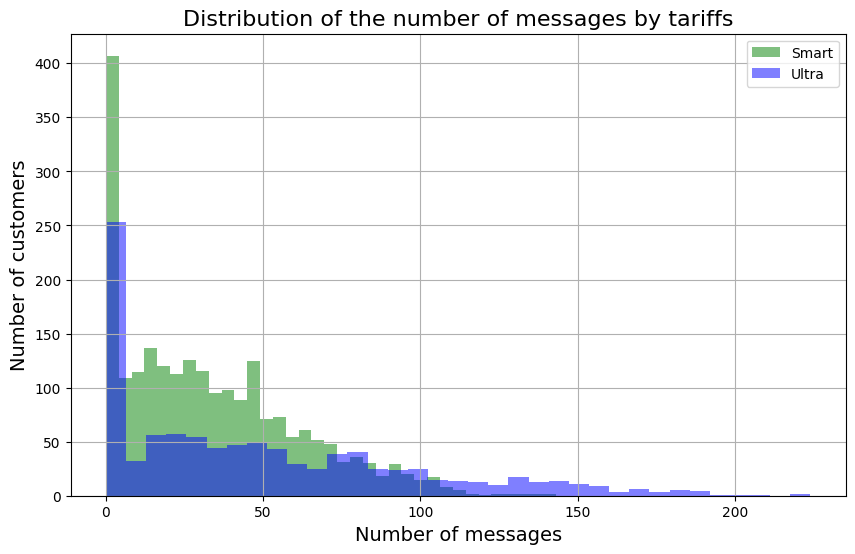

In [51]:
plt.figure(figsize=(10, 6))

user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of messages', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Distribution of the number of messages by tariffs', fontsize=16);

On average, users of the Ultra tariff send more messages - almost 20 messages more than Smart tariff users. The number of messages on both tariffs increases over the year. The dynamics of message sending is similar to the trends in call duration: in February, the lowest number of messages for the year is observed, and Ultra tariff users also show nonlinear positive dynamics.

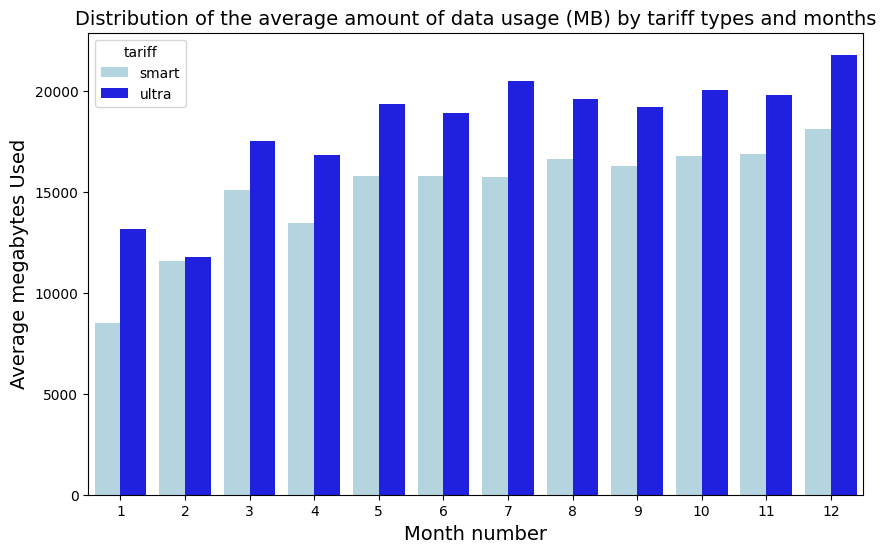

In [52]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the average amount of data usage (MB) by tariff types and months', fontsize=14)
ax.set_xlabel('Month number', fontsize=14)
ax.set_ylabel('Average megabytes Used', fontsize=14);

# Comparison of data usage among Smart and Ultra tariff users:

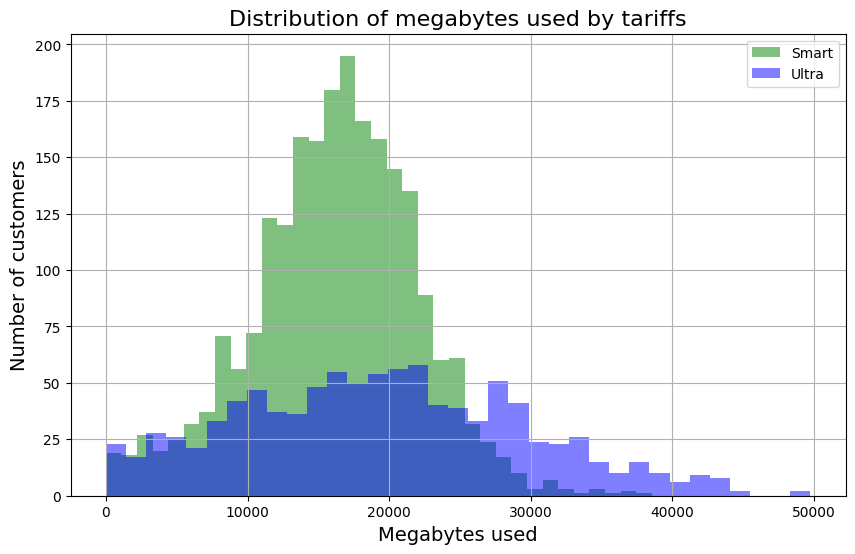

In [53]:
plt.figure(figsize=(10, 6))

user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Megabytes used', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Distribution of megabytes used by tariffs', fontsize=16);

Users used the least internet in January, February, and April. Most often, Smart tariff subscribers spend 15-17 GB, while Ultra tariff subscribers spend 19-21 GB.

# Hypothesis Testing

## Hypothesis: The average revenue of users of the "Ultra" and "Smart" tariffs differs.

- Null Hypothesis (H0): Revenue (total_cost) of "Ultra" users = Revenue (total_cost) of "Smart" users.
- Alternative Hypothesis (Ha): Revenue (total_cost) of "Ultra" users ≠ Revenue (total_cost) of "Smart" users.
- Significance Level (alpha) = 0.05


In [54]:
smart_total_cost = user_behavior.query('tariff == "smart"')['total_cost'].tolist()
ultra_total_cost = user_behavior.query('tariff == "ultra"')['total_cost'].tolist()

# Perform hypothesis testing
results = st.ttest_ind(smart_total_cost, ultra_total_cost, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print the p-value
print(results.pvalue)

# Conditional statement to interpret the results
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

4.2606313931076085e-250
Reject the null hypothesis


# Hypothesis: Users from Moscow generate more revenue than users from other cities:

- Null Hypothesis (H0): Revenue (total_cost) of users from Moscow = Revenue (total_cost) of users from other cities.
- Alternative Hypothesis (Ha): Revenue (total_cost) of users from Moscow ≠ Revenue (total_cost) of users from other cities.
- Significance Level (alpha) = 0.05

In [55]:
moscow_total_cost = user_behavior.query('city == "Москва"')['total_cost'].tolist()
other_cities_total_cost = user_behavior.query('city != "Москва"')['total_cost'].tolist()

# Perform hypothesis testing
results = st.ttest_ind(moscow_total_cost, other_cities_total_cost, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print the p-value
print(results.pvalue)

# Conditional statement to interpret the results
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

0.5257376663729298
Fail to reject the null hypothesis
